In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [6]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [ ]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[0.851, 0.624, 0.857, 0.585], [-1.58, ... -1.58], [0.0659, -0.894, -0.858, 0.107]]
2mu2e eta structure: [[2.33, 2.35], [-0.658, -0.563], [1.04, ... -0.29], [-0.986, -0.955], [-1.59, -1.58]]
4mu eta structure: [[-1.24, 0.266, 0.257, -1.27], [-0.511, ... -1.63], [0.21, -0.854, -0.841, 0.051]]
2mu2e eta structure: [[-0.0941, -0.105], [0.92, 0.902], ... [-0.845, -0.886, -1.76], [0.371, 0.339]]
4mu eta structure: [[-1.88, 0.0124, -1.92, 0.302, -1.94], [0.58, ... [2.1, 2.08, -0.136, 0.16, 2.17]]
2mu2e eta structure: [[0.248, 0.219], [0.933, 0.971], [-0.152, ... [1.69, 1.61], [0.0572, 0.0986]]
4mu eta structure: [[0.295, 1.76, 0.34, 1.73], [-0.836, 0.389, ... -1.44, 0.495], [2.27, 2.36, 2.27]]
2mu2e eta structure: [[0.55, 0.577], [-0.0189, 0.037], [1.61, ... [-1.67, -1.71], [-0.238, -0.333]]
4mu eta structure: [[0.672, 1.08, 1.1], [], [-0.169, -0.134, ... [0.271, -0.564, -0.667], [-1.41, 1.05]]
2mu2e eta structure: [[0.967, 1.02, 0.647], [-0.147], [0.151], ... [1.34, 1.34,

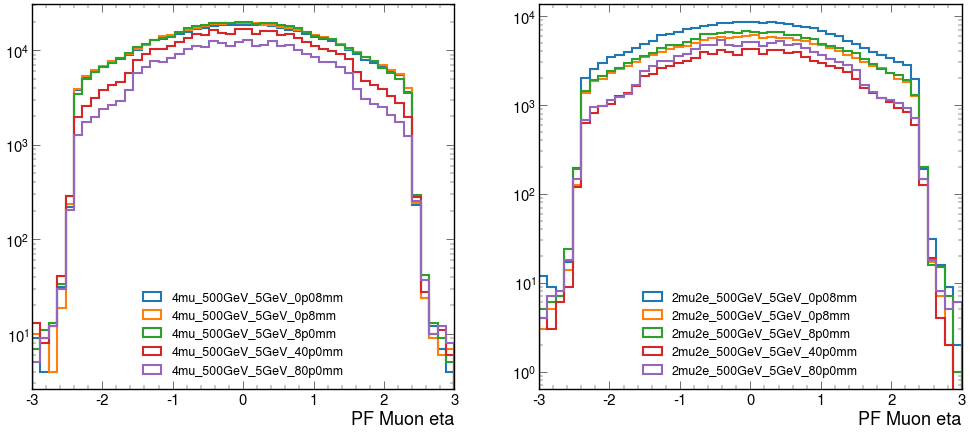

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon eta')
ax[1].set_xlabel('PF Muon eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... [0.106, 0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106, 0.106], ... [0.106, 0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106, 0.106], [0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106], ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106], [], [0.106, 0.106, ... [0.106, 0.106, 0.106], [0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106, 0.106], [0.106], [0.106, .

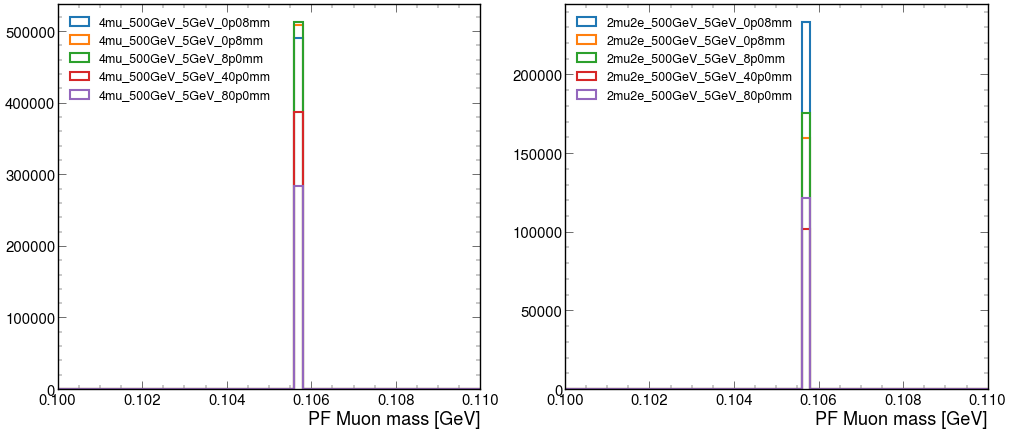

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(0.1,0.110), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(0.1,0.110), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0.1,0.110)
ax[1].set_xlim(0.1,0.110)
ax[0].set_xlabel('PF Muon mass [GeV]')
ax[1].set_xlabel('PF Muon mass [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/V2/PF_MUON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[0.199, -2.96, 0.156, -2.99], [1.31, -1.83, ... -1.42], [-0.99, 1.98, 2.01, -1.02]]
2mu2e phi structure: [[2.13, 2.23], [3.1, 3.01], [0.4, 1.4, ... 1.4, 1.4], [1.49, 1.43], [-1.52, -1.58]]
4mu phi structure: [[-2.67, 0.482, 0.477, -2.71], [-2.01, ... -0.461], [-0.416, 2.77, 2.73, -0.485]]
2mu2e phi structure: [[1.27, 1.32], [0.184, 0.329], [-1.58, ... [-0.139, -0.152, 1.08], [2.44, 2.48]]
4mu phi structure: [[-0.724, 2.45, -0.776, 2.73, 1.58], [0.144, ... [2.73, 2.83, 0.594, 0.577, 2.77]]
2mu2e phi structure: [[-1.63, -1.66], [1.6, 1.61], [2.36, 2.42, ... 1.72], [1.62, 1.54], [2.31, 2.32]]
4mu phi structure: [[-0.487, 2.43, -0.505, 2.51], [-1.96, 1.17, ... 2.86, 0.883], [0.766, -2.35, 0.761]]
2mu2e phi structure: [[0.703, 0.671], [-1.56, -1.43], [3.04], ... [2.34], [2.83, 2.78], [-2.46, -2.42]]
4mu phi structure: [[-0.88, 2.31, 1.92], [], [-2.83, 0.339, ... [-1.6, 1.93, 1.82], [-2.88, 0.578]]
2mu2e phi structure: [[-2.12, -2.16, 0.884], [-2.36], [-0.329, ... -0.191,

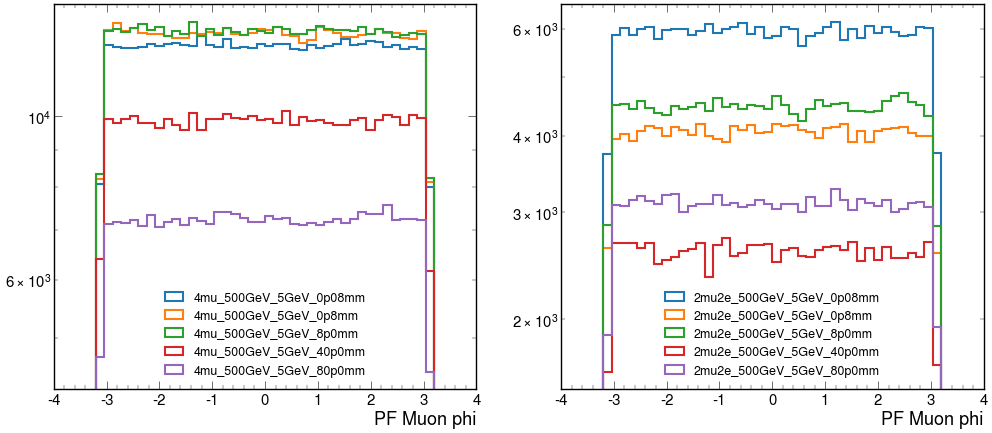

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon phi')
ax[1].set_xlabel('PF Muon phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[187, 178, 73.8, 65.7], [232, 182, 63.8, ... 100, 96.2, 75], [173, 161, 73.8, 33.1]]
2mu2e pt structure: [[85.5, 25.5], [239, 6.4], [196, 17.8, 6.03, ... 215, 27.6], [91.9, 56.7], [141, 42]]
4mu pt structure: [[131, 99.6, 86.5, 59], [206, 184, 63.2, ... 9.4, 3.33], [218, 125, 84.3, 4.18]]
2mu2e pt structure: [[110, 82.1], [246, 6.21], [211, 41.3], ... 74.3], [167, 82.5, 4.75], [156, 56.9]]
4mu pt structure: [[120, 98.7, 50.8, 23.1, 3.56], [404, ... 20.7], [2.13e+03, 133, 98.6, 73.7, 16.8]]
2mu2e pt structure: [[120, 98.3], [139, 109], [177, 17.6], ... [108, 79.5], [47.9, 42.4], [128, 103]]
4mu pt structure: [[258, 186, 82.5, 25.4], [544, 194, 127, ... 209, 181, 38.2, 5.35], [137, 43.8, 32]]
2mu2e pt structure: [[162, 73.5], [167, 7.38], [119], [279], ... 3.07], [54.6], [162, 36.7], [200, 47.3]]
4mu pt structure: [[85.5, 16.5, 4.3], [], [598, 197, 92.8], ... 28.7], [69.7, 68.6, 19.5], [647, 32.2]]
2mu2e pt structure: [[222, 29, 21.7], [234], [223], [3.51], ... [382], 

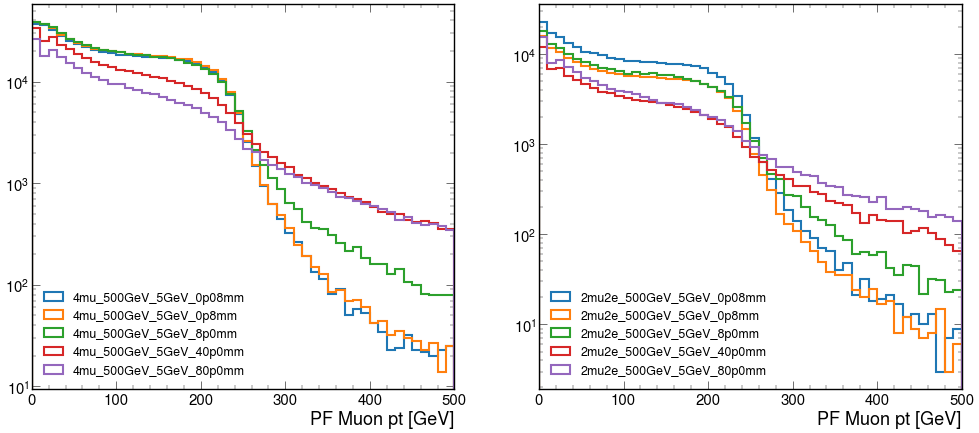

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[0].set_xlabel('PF Muon pt [GeV]')
ax[1].set_xlabel('PF Muon pt [GeV]')
ax[0].legend(fontsize=18, loc='lower left')
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/pt.png", bbox_inches="tight")

## outerEta

4mu outerEta structure: [[0.849, 0.624, 0.857, 0.585], [-1.58, ... -1.55], [0.0986, -0.895, -0.858, 0.0986]]
2mu2e outerEta structure: [[2.33, 2.35], [-0.658, -0.556], [1.04, ... [-0.988, -0.953], [-1.59, -1.59]]
4mu outerEta structure: [[-1.25, 0.267, 0.318, -1.27], [-0.509, ... -1.57], [0.209, -0.854, -0.841, 0.0879]]
2mu2e outerEta structure: [[-0.0941, -0.103], [0.868, 0.829], ... [-0.847, -0.889, -1.76], [0.371, 0.337]]
4mu outerEta structure: [[-1.88, 0.153, -1.92, 0.297, -1.95], ... [2.11, 2.08, -0.0691, 0.0048, 2.18]]
2mu2e outerEta structure: [[0.249, 0.219], [0.933, 0.973], [-0.15, ... -0.625], [1.69, 1.61], [0.0949, 0.0964]]
4mu outerEta structure: [[0.294, 1.76, 0.34, 1.71], [-0.832, 0.389, ... -1.44, 0.59], [2.27, 2.36, 2.25]]
2mu2e outerEta structure: [[0.552, 0.582], [-0.0182, 0.0311], [1.62, ... [-1.67, -1.71], [-0.238, -0.2]]
4mu outerEta structure: [[0.674, 1.08, 1.12], [], [-0.169, -0.134, ... [0.267, -0.56, -0.658], [-1.41, 1.04]]
2mu2e outerEta structure: [[0.967, 

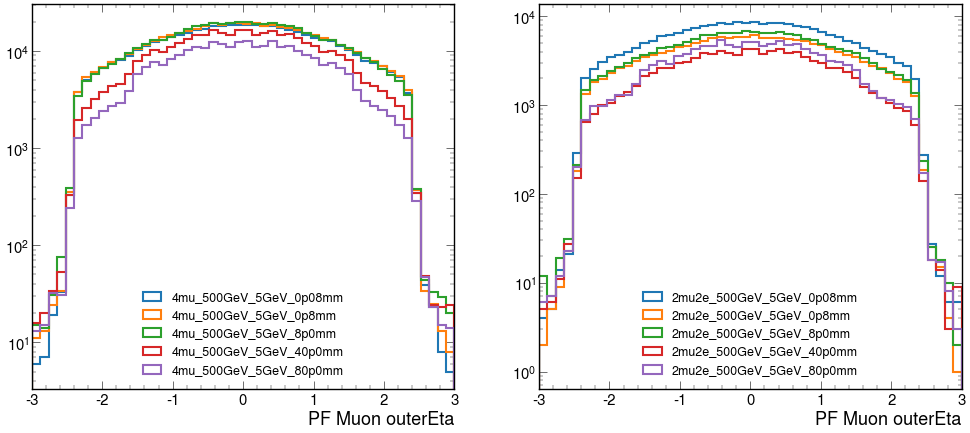

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerEta", events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon outerEta')
ax[1].set_xlabel('PF Muon outerEta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/outerEta.png", bbox_inches="tight")

## eta - outerEta

4mu eta - outerEta structure: [[0.00246, -0.00037, -8.58e-06, 4.02e-05, ... -0.0327, 0.000355, -4.14e-05, 0.00794]]
2mu2e eta - outerEta structure: [[4.34e-05, 0.00147], [-0.000499, -0.00736, ... -0.00181], [-0.00273, 0.00797]]
4mu eta - outerEta structure: [[0.00195, -0.000974, -0.0606, 1.65e-05], ... 0.000323, -0.000362, 3.83e-05, -0.037]]
2mu2e eta - outerEta structure: [[-1.8e-05, -0.00223], [0.0525, 0.0731, ... 0.00348, -0.00449], [-0.000252, 0.00209]]
4mu eta - outerEta structure: [[-0.000587, -0.14, -0.000135, 0.00454, 0.011, ... 0.00172, -0.067, 0.155, -0.00818]]
2mu2e eta - outerEta structure: [[-0.000865, -5.5e-06], [7.17e-05, -0.00181, ... 0.00174], [-0.0377, 0.00217]]
4mu eta - outerEta structure: [[0.000215, -6.97e-05, -0.000278, 0.0192], ... [-0.000436, 0.00341, 0.0189]]
2mu2e eta - outerEta structure: [[-0.00229, -0.00538], [-0.000735, 0.00588, ... -0.00458], [-0.000168, -0.132]]
4mu eta - outerEta structure: [[-0.00221, 0.00893, -0.0146], [], ... -0.00384, -0.00898], [-

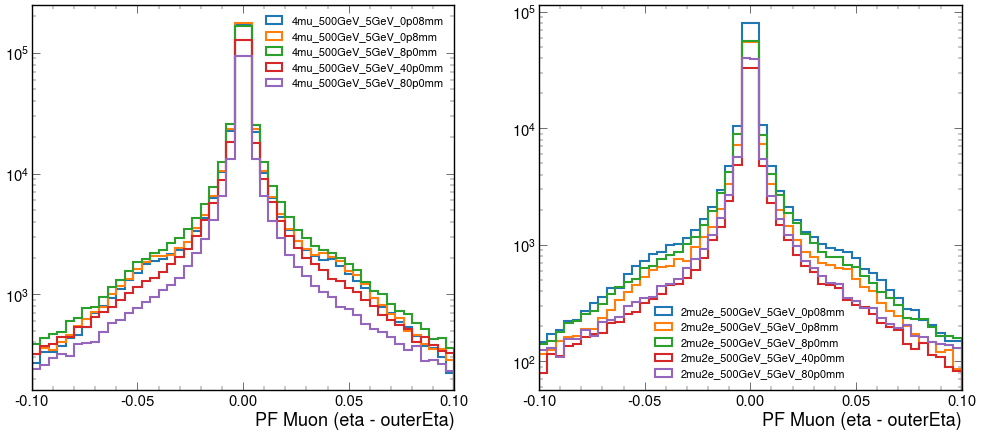

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - outerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (eta - outerEta)')
ax[1].set_xlabel('PF Muon (eta - outerEta)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.1,-0.05,0,0.05,0.1])
ax[1].set_xticks([-0.1,-0.05,0,0.05,0.1])
plt.savefig("../Plots/V2/PF_MUON/Basic/eta-outerEta.png", bbox_inches="tight")

## outerPhi

4mu outerPhi structure: [[0.181, -2.98, 0.172, -2.97], [1.3, -1.83, ... -1.39], [-0.972, 2, 1.99, -1.12]]
2mu2e outerPhi structure: [[2.14, 2.19], [3.09, -2.73], [0.385, 1.23, ... 1.5], [1.52, 1.37], [-1.51, -1.63]]
4mu outerPhi structure: [[-2.65, 0.515, 0.446, -2.74], [-1.99, 1.06, ... 0.0847], [-0.43, 2.75, 2.74, 0.633]]
2mu2e outerPhi structure: [[1.28, 1.3], [0.195, -0.185], [-1.59, ... [-0.159, -0.12, 1.37], [2.42, 2.54]]
4mu outerPhi structure: [[-0.737, 2.43, -0.758, 2.93, 1.38], [0.148, ... [2.74, 2.84, 0.566, 0.617, 2.71]]
2mu2e outerPhi structure: [[-1.66, -1.65], [1.62, 1.59], [2.34, 2.59, ... 1.76], [1.65, 1.49], [2.33, 2.29]]
4mu outerPhi structure: [[-0.498, 2.44, -0.472, 2.49], [-1.96, 1.16, ... 2.91, 1.15], [0.787, -2.36, 0.741]]
2mu2e outerPhi structure: [[0.723, 0.627], [-1.55, -1.87], [3.02], ... [2.41], [2.84, 2.73], [-2.45, -2.5]]
4mu outerPhi structure: [[-0.814, 2.48, 2.34], [], [-2.82, 0.355, ... [-1.65, 1.85, 1.88], [-2.88, 0.488]]
2mu2e outerPhi structure: [[

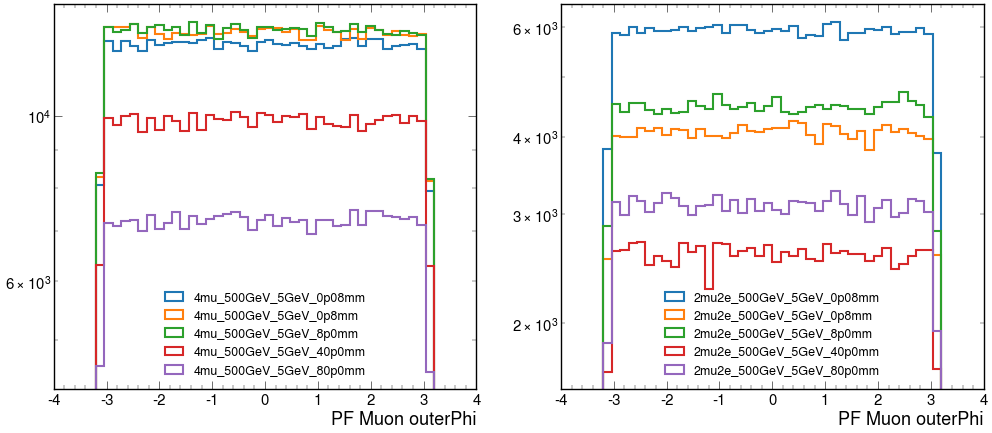

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerPhi", events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon outerPhi')
ax[1].set_xlabel('PF Muon outerPhi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/outerPhi.png", bbox_inches="tight")

## phi - outerPhi

4mu phi - outerPhi structure: [[0.0177, 0.0182, -0.0165, -0.0191], ... [-0.0186, -0.0199, 0.0168, 0.101]]
2mu2e phi - outerPhi structure: [[-0.0103, 0.0418], [0.013, 5.74], ... [-0.0281, 0.0611], [-0.0131, 0.0426]]
4mu phi - outerPhi structure: [[-0.0195, -0.0323, 0.0308, 0.0211], ... [0.0148, 0.0225, -0.0135, -1.12]]
2mu2e phi - outerPhi structure: [[-0.0115, 0.0221], [-0.011, 0.514], ... 0.0193, -0.0319, -0.288], [0.0219, -0.055]]
4mu phi - outerPhi structure: [[0.0136, 0.0224, -0.0176, -0.197, 0.201, ... -0.00987, 0.0278, -0.0401, 0.0639]]
2mu2e phi - outerPhi structure: [[0.0279, -0.0124], [-0.019, 0.0253], ... [-0.0362, 0.047], [-0.0253, 0.0324]]
4mu phi - outerPhi structure: [[0.0107, -0.00549, -0.0334, 0.0237], ... -0.262], [-0.0205, 0.0142, 0.021]]
2mu2e phi - outerPhi structure: [[-0.0207, 0.0439], [-0.0167, 0.446], ... [-0.00829, 0.0485], [-0.0164, 0.0763]]
4mu phi - outerPhi structure: [[-0.0666, -0.175, -0.418], [], ... 0.0484, 0.0771, -0.0602], [0.00314, 0.09]]
2mu2e phi -

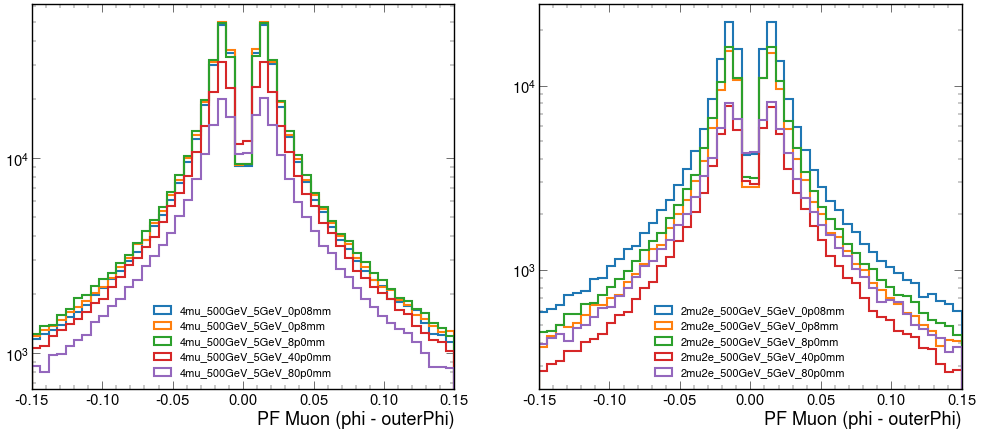

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - outerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi), range=(-0.15,0.15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi), range=(-0.15,0.15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.15,0.15)
ax[1].set_xlim(-0.15,0.15)
ax[0].set_xlabel('PF Muon (phi - outerPhi)')
ax[1].set_xlabel('PF Muon (phi - outerPhi)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_MUON/Basic/phi-outerPhi.png", bbox_inches="tight")

## innerPt

In [14]:
import awkward as ak

In [15]:
print(min(ak.flatten(events_4mu[i_4mu].innerPt)))

-1.0


4mu innerPt structure: [[187, 178, 73.8, 65.7], [236, 182, 63.8, ... 100, 96.2, 75], [173, 161, 73.8, 33.1]]
2mu2e innerPt structure: [[85.5, 25.5], [241, 6.4], [196, 17.8, 6.03, ... 217, 27.6], [91.9, 56.7], [141, 42]]
4mu innerPt structure: [[131, 99.6, 86.5, 59], [207, 184, 63.2, ... 9.69, 3.33], [215, 125, 84.3, 4.18]]
2mu2e innerPt structure: [[110, 82.1], [240, 6.21], [214, 41.3], ... 74.3], [167, 82.5, 4.75], [156, 56.9]]
4mu innerPt structure: [[120, 182, 50.8, -1, 3.56], [-1, 226, ... 20.7], [2.13e+03, 133, 98.6, 73.7, 16.8]]
2mu2e innerPt structure: [[120, 98.3], [139, 109], [177, 17.6], ... [-1, 79.5], [47.9, 42.4], [128, 103]]
4mu innerPt structure: [[-1, 186, -1, 25.4], [-1, -1, -1, 3.86], ... [-1, -1, -1, 5.35], [-1, -1, -1]]
2mu2e innerPt structure: [[162, 73.5], [167, 7.38], [119], [-1], ... [3.07], [-1], [162, 36.7], [223, 47.3]]
4mu innerPt structure: [[-1, -1, 9.73], [], [-1, -1, 92.8], [-1, ... -1, -1, 434], [-1, -1, -1], [-1, -1]]
2mu2e innerPt structure: [[-1, 117

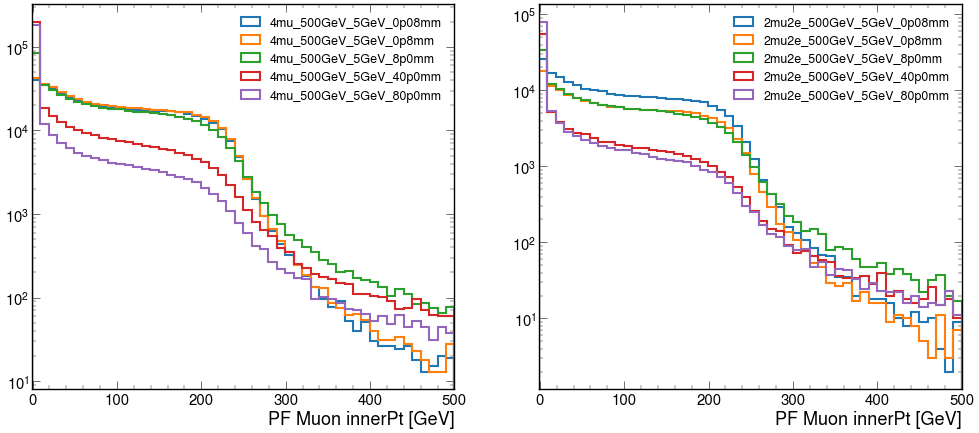

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPt", events_4mu[i_4mu].innerPt, events_2mu2e[i_2mu].innerPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPt), range=(-1,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPt), range=(-1,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-1,500)
ax[1].set_xlim(-1,500)
ax[0].set_xlabel('PF Muon innerPt [GeV]')
ax[1].set_xlabel('PF Muon innerPt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/innerPt.png", bbox_inches="tight")

## pt - innerPt

4mu pt - innerPt structure: [[0, 0, 0, 0], [-3.93, 0, 0, 17.6, 0], [-3.21, ... 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [-1.41, 0], [0, 0, 0], [0, 0], ... [0, 0], [-1.79, 0], [0, 0], [0, 0]]
4mu pt - innerPt structure: [[0, 0, 0, 0], [-0.687, 0, 0, 0], [0, ... [0, 0, 0, 0, -0.294, 0], [2.88, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [5.45, 0], [-2.25, 0], [0, 0], ... [4.32, 0], [0, 0], [0, 0, 0], [0, 0]]
4mu pt - innerPt structure: [[0, -83, 0, 24.1, 0], [405, -11.1, 0], [0, 0, ... 0], [0, 0, 0, 0], [0, 0, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, ... 0], [7.43, 45.7], [109, 0], [0, 0], [0, 0]]
4mu pt - innerPt structure: [[259, 0, 83.5, 0], [545, 195, 128, 0], ... [210, 182, 39.2, 0], [138, 44.8, 33]]
2mu2e pt - innerPt structure: [[0, 0], [0, 0], [0], [280], [0, 75.4, 0, ... 0, 0], [0], [55.6], [0, 0], [-23.3, 0]]
4mu pt - innerPt structure: [[86.5, 17.5, -5.44], [], [599, 198, 0], ... -405], [70.7, 69.6, 20.5

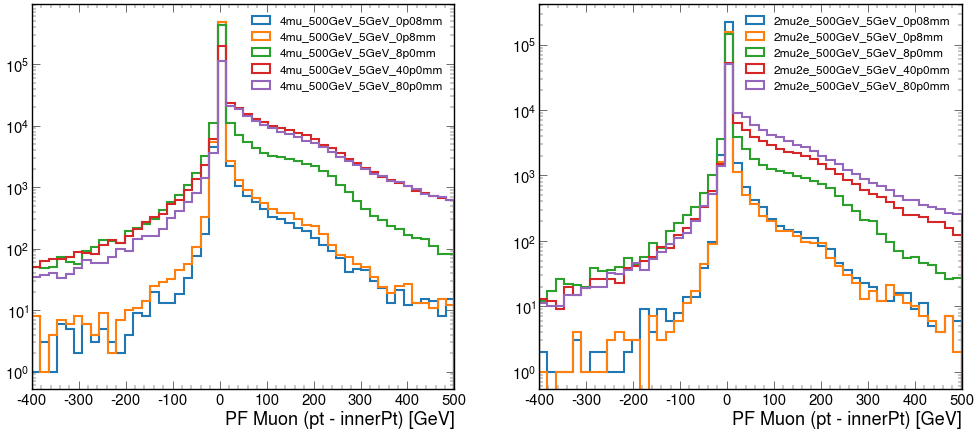

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - innerPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].innerPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].innerPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].innerPt), range=(-400,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].innerPt), range=(-400,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-400,500)
ax[1].set_xlim(-400,500)
ax[0].set_xlabel('PF Muon (pt - innerPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - innerPt) [GeV]')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=17)
ax[1].legend(fontsize=17)
plt.savefig("../Plots/V2/PF_MUON/Basic/pt-innerPt.png", bbox_inches="tight")

## innerEta

4mu innerEta structure: [[0.851, 0.624, 0.857, 0.585], [-1.58, ... -1.58], [0.0659, -0.894, -0.858, 0.107]]
2mu2e innerEta structure: [[2.33, 2.35], [-0.658, -0.564], [1.04, ... -0.29], [-0.986, -0.955], [-1.59, -1.58]]
4mu innerEta structure: [[-1.24, 0.266, 0.257, -1.27], [-0.511, ... -1.63], [0.21, -0.854, -0.841, 0.051]]
2mu2e innerEta structure: [[-0.0941, -0.105], [0.92, 0.902], ... [-0.845, -0.886, -1.76], [0.371, 0.339]]
4mu innerEta structure: [[-1.88, -0.0514, -1.92, -5, -1.94], [-5, ... [2.1, 2.08, -0.136, 0.16, 2.17]]
2mu2e innerEta structure: [[0.248, 0.219], [0.933, 0.971], [-0.152, ... [1.69, 1.61], [0.0572, 0.0986]]
4mu innerEta structure: [[-5, 1.76, -5, 1.73], [-5, -5, -5, -0.895], ... [-5, -5, -5, 0.495], [-5, -5, -5]]
2mu2e innerEta structure: [[0.55, 0.577], [-0.0189, 0.037], [1.61], ... [-5], [-1.67, -1.71], [-0.239, -0.333]]
4mu innerEta structure: [[-5, -5, 1.1], [], [-5, -5, -0.134], ... -5, -5, 0.767], [-5, -5, -5], [-5, -5]]
2mu2e innerEta structure: [[-5, 1.

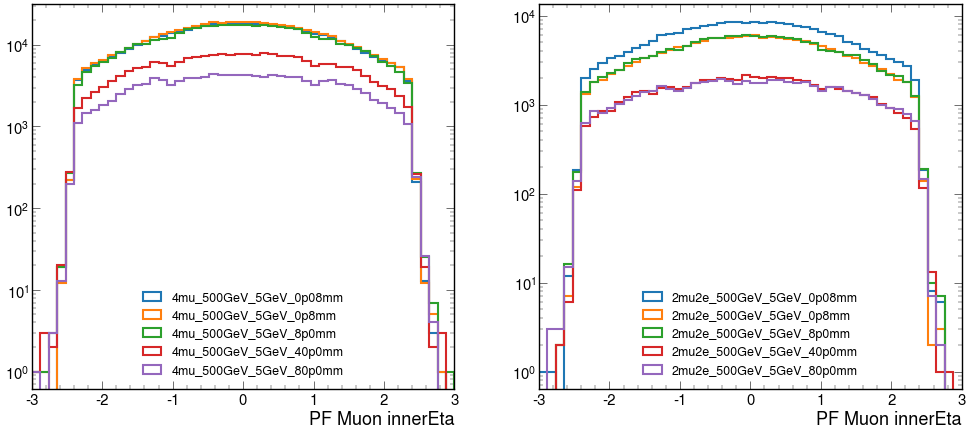

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerEta", events_4mu[i_4mu].innerEta, events_2mu2e[i_2mu].innerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon innerEta')
ax[1].set_xlabel('PF Muon innerEta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/innerEta.png", bbox_inches="tight")

## eta - innerEta

4mu eta - innerEta structure: [[-4.65e-06, -2.07e-05, -6.97e-06, 5.45e-05, ... 3.71e-05, -5.14e-05, -2.92e-06]]
2mu2e eta - innerEta structure: [[0.000184, -0.000146], [-2.35e-05, 4.29e-05, ... -3.92e-05], [-3.22e-06, -0.000113]]
4mu eta - innerEta structure: [[-2.53e-05, 8.58e-06, 1.07e-05, 4.16e-05, ... -1.99e-05, 5.11e-05, 4.88e-07]]
2mu2e eta - innerEta structure: [[-1.65e-06, 7.03e-06], [4.43e-05, -3.32e-05, ... -2.26e-06], [-1.48e-05, -1.48e-05]]
4mu eta - innerEta structure: [[-6.12e-05, 0.0638, -0.000114, 5.3, ... -4.84e-05, -7.21e-06, 2.07e-06, -2.46e-05]]
2mu2e eta - innerEta structure: [[-1.77e-06, 2.12e-06], [-4.43e-05, 2.32e-05, ... -7.99e-05], [-2.64e-06, 4.75e-06]]
4mu eta - innerEta structure: [[5.29, -3.71e-05, 5.34, 2.11e-05], [4.16, ... 3.56, -1.79e-05], [7.27, 7.36, 7.27]]
2mu2e eta - innerEta structure: [[3.3e-05, -3.69e-05], [3.74e-07, -1.91e-06, ... 7.53e-05], [0.00075, 7.15e-06]]
4mu eta - innerEta structure: [[5.67, 6.08, -0.000241], [], [4.83, 4.87, ... [5.27,

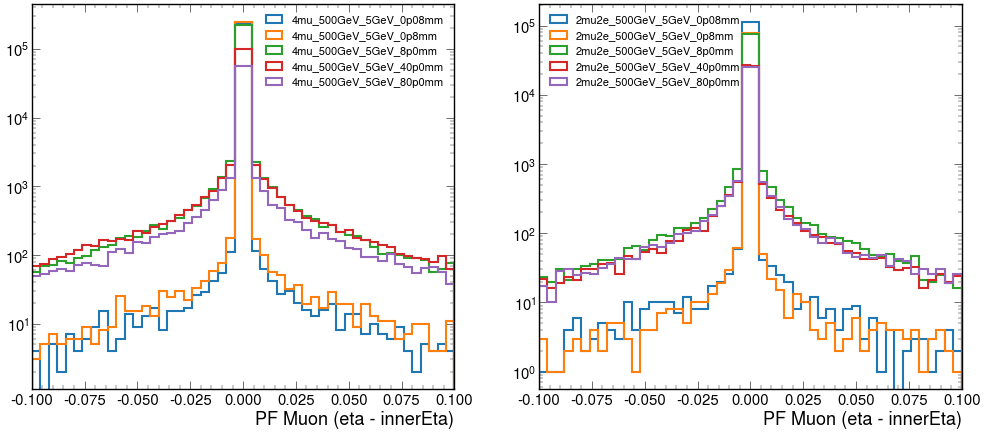

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - innerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].innerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].innerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].innerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].innerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (eta - innerEta)')
ax[1].set_xlabel('PF Muon (eta - innerEta)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/V2/PF_MUON/Basic/eta-innerEta.png", bbox_inches="tight")

## innerEta - outerEta

4mu innerEta - outerEta structure: [[0.00246, -0.000349, -1.61e-06, -1.43e-05], ... [-0.0327, 0.000318, 1e-05, 0.00794]]
2mu2e innerEta - outerEta structure: [[-0.00014, 0.00162], [-0.000476, -0.0074, ... -0.00177], [-0.00273, 0.00808]]
4mu innerEta - outerEta structure: [[0.00198, -0.000983, -0.0606, -2.52e-05, ... -0.000342, -1.29e-05, -0.037]]
2mu2e innerEta - outerEta structure: [[-1.63e-05, -0.00224], [0.0525, 0.0731, ... 0.00352, -0.00449], [-0.000237, 0.0021]]
4mu innerEta - outerEta structure: [[-0.000526, -0.204, -2.06e-05, -5.3, 0.0112, ... 0.00177, -0.067, 0.155, -0.00815]]
2mu2e innerEta - outerEta structure: [[-0.000863, -7.61e-06], [0.000116, -0.00183, ... 0.00182], [-0.0377, 0.00217]]
4mu innerEta - outerEta structure: [[-5.29, -3.27e-05, -5.34, 0.0192], [-4.17, ... -0.0955], [-7.27, -7.36, -7.25]]
2mu2e innerEta - outerEta structure: [[-0.00233, -0.00534], [-0.000736, 0.00588, ... -0.00465], [-0.000918, -0.132]]
4mu innerEta - outerEta structure: [[-5.67, -6.08, -0.0144

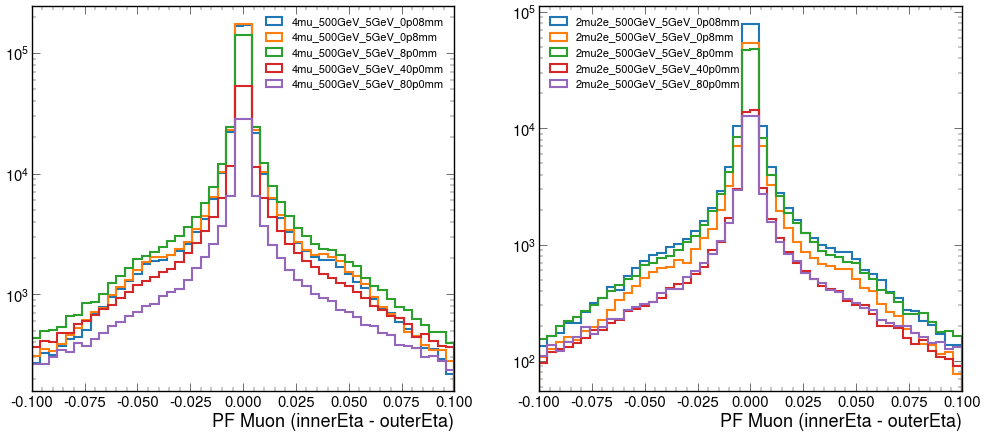

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerEta - outerEta", events_4mu[i_4mu].innerEta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].innerEta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerEta - events_4mu[i_4mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerEta - events_2mu2e[i_2mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (innerEta - outerEta)')
ax[1].set_xlabel('PF Muon (innerEta - outerEta)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/V2/PF_MUON/Basic/innerEta-outerEta.png", bbox_inches="tight")

## innerPhi

4mu innerPhi structure: [[0.199, -2.96, 0.156, -2.99], [1.31, -1.83, ... -1.42], [-0.99, 1.98, 2.01, -1.02]]
2mu2e innerPhi structure: [[2.13, 2.23], [3.1, 3.01], [0.4, 1.4, ... 1.4, 1.4], [1.49, 1.43], [-1.52, -1.58]]
4mu innerPhi structure: [[-2.67, 0.482, 0.477, -2.72], [-2.01, ... -0.461], [-0.416, 2.77, 2.73, -0.485]]
2mu2e innerPhi structure: [[1.27, 1.32], [0.184, 0.329], [-1.58, ... [-0.139, -0.152, 1.08], [2.44, 2.48]]
4mu innerPhi structure: [[-0.723, 2.45, -0.776, -5, 1.58], [-5, ... 2.07], [2.73, 2.83, 0.594, 0.577, 2.77]]
2mu2e innerPhi structure: [[-1.63, -1.66], [1.6, 1.61], [2.36, 2.42, ... -5, 1.72], [1.62, 1.54], [2.31, 2.32]]
4mu innerPhi structure: [[-5, 2.43, -5, 2.51], [-5, -5, -5, -1.47], ... [-5, -5, -5, 0.883], [-5, -5, -5]]
2mu2e innerPhi structure: [[0.703, 0.671], [-1.56, -1.43], [3.04], ... [-5], [2.83, 2.78], [-2.46, -2.42]]
4mu innerPhi structure: [[-5, -5, 1.94], [], [-5, -5, 0.34], ... -5, -5, -0.235], [-5, -5, -5], [-5, -5]]
2mu2e innerPhi structure: [

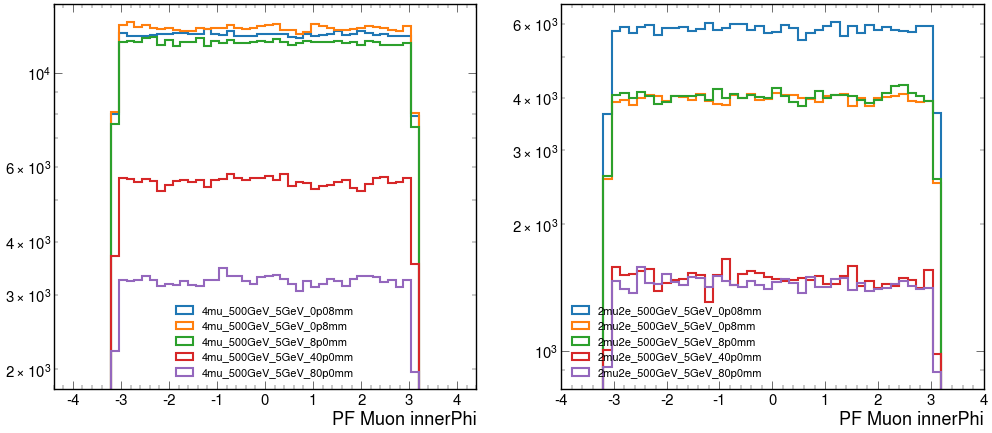

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPhi", events_4mu[i_4mu].innerPhi, events_2mu2e[i_2mu].innerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4.4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon innerPhi')
ax[1].set_xlabel('PF Muon innerPhi')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='lower left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/innerPhi.png", bbox_inches="tight")

## phi - innerPhi

4mu phi - innerPhi structure: [[-6.87e-06, 7.87e-06, 1.04e-05, 7.63e-06, ... 0.000104, -3.74e-05, 4.43e-05]]
2mu2e phi - innerPhi structure: [[0.000145, 0.000123], [2.1e-05, 9.8e-05, ... 2.44e-05], [6.84e-05, -9.74e-05]]
4mu phi - innerPhi structure: [[-6.72e-05, -4.62e-06, 1.83e-05, 0.000167, ... 0.00014, -0.00022, -8.46e-06]]
2mu2e phi - innerPhi structure: [[-6.38e-05, -2.46e-05], [5.68e-05, 2.88e-05, ... 6.76e-05], [7.46e-05, -0.000224]]
4mu phi - innerPhi structure: [[-2.88e-05, 0.00306, 5.8e-05, 7.73, ... -3.08e-05, -1.31e-05, 6e-05, 0.000182]]
2mu2e phi - innerPhi structure: [[9.82e-05, 1.07e-05], [-2.71e-05, 7.26e-05, ... -6.83e-05], [-8.3e-05, 3.15e-05]]
4mu phi - innerPhi structure: [[4.51, -1.24e-05, 4.49, -0.000161], [3.04, ... 7.86, -5.01e-05], [5.77, 2.65, 5.76]]
2mu2e phi - innerPhi structure: [[-1.76e-05, 2.9e-05], [-9.3e-06, -2.19e-05, ... -0.000184], [-0.000699, -3.91e-05]]
4mu phi - innerPhi structure: [[4.12, 7.31, -0.0244], [], [2.17, 5.34, ... [3.4, 6.93, 6.82], [

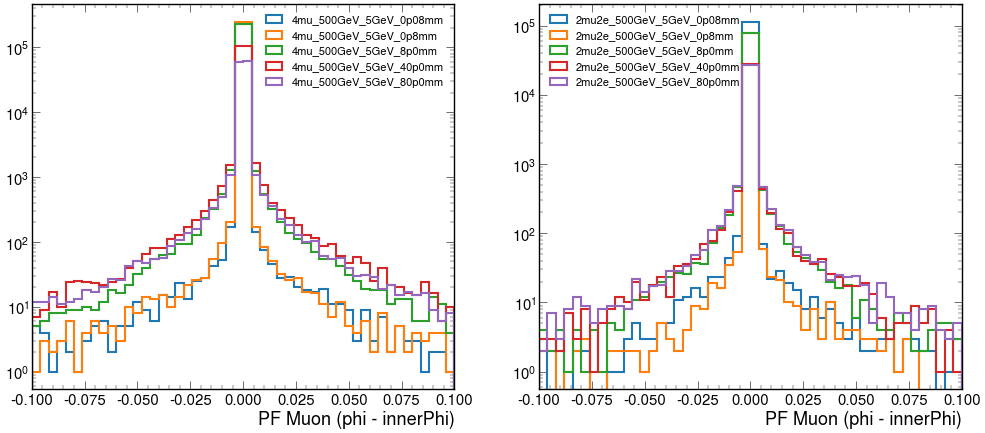

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - innerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].innerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].innerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].innerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].innerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (phi - innerPhi)')
ax[1].set_xlabel('PF Muon (phi - innerPhi)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16,loc="upper left")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/phi-innerPhi.png", bbox_inches="tight")

## innerPhi - outerPhi

4mu innerPhi - outerPhi structure: [[0.0178, 0.0182, -0.0165, -0.0191], [0.0121, ... [-0.0186, -0.02, 0.0169, 0.101]]
2mu2e innerPhi - outerPhi structure: [[-0.0105, 0.0417], [0.0129, 5.74], ... [-0.0281, 0.0611], [-0.0132, 0.0427]]
4mu innerPhi - outerPhi structure: [[-0.0195, -0.0323, 0.0308, 0.0209], ... [0.0148, 0.0223, -0.0133, -1.12]]
2mu2e innerPhi - outerPhi structure: [[-0.0114, 0.0222], [-0.0111, 0.514], ... -0.0319, -0.288], [0.0218, -0.0548]]
4mu innerPhi - outerPhi structure: [[0.0137, 0.0193, -0.0176, -7.93, 0.201, ... -0.00984, 0.0278, -0.0402, 0.0638]]
2mu2e innerPhi - outerPhi structure: [[0.0278, -0.0125], [-0.019, 0.0253], ... [-0.0362, 0.0471], [-0.0252, 0.0324]]
4mu innerPhi - outerPhi structure: [[-4.5, -0.00548, -4.53, 0.0238], [-3.04, ... -7.91, -0.262], [-5.79, -2.64, -5.74]]
2mu2e innerPhi - outerPhi structure: [[-0.0207, 0.0439], [-0.0167, 0.446], ... [-0.00821, 0.0487], [-0.0157, 0.0763]]
4mu innerPhi - outerPhi structure: [[-4.19, -7.48, -0.394], [], [-2.18

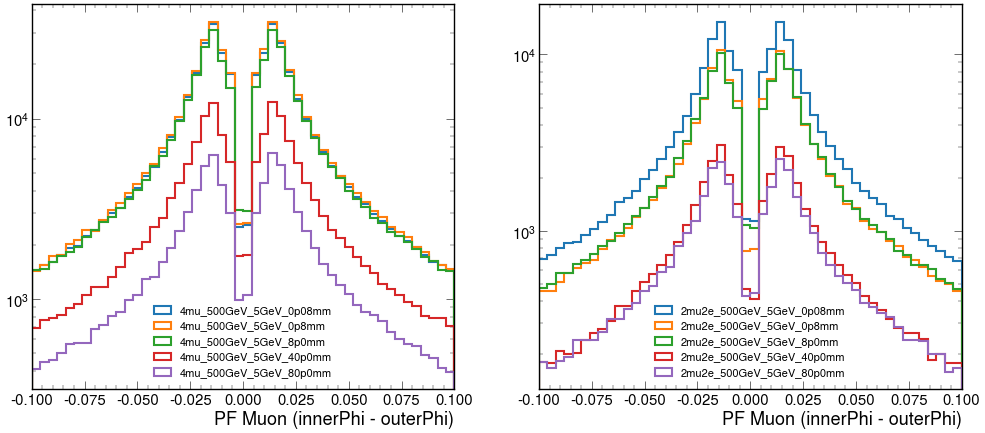

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPhi - outerPhi", events_4mu[i_4mu].innerPhi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].innerPhi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPhi - events_4mu[i_4mu].outerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPhi - events_2mu2e[i_2mu].outerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (innerPhi - outerPhi)')
ax[1].set_xlabel('PF Muon (innerPhi - outerPhi)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_MUON/Basic/innerPhi-outerPhi.png", bbox_inches="tight")